<a href="https://colab.research.google.com/github/Hyrysake/My_Data_Science/blob/main/Hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 250  # обмеження кількості слів в тексті
batch_size=64

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features, maxlen=maxlen)
print(f"Загальна кількість зразків тренувальних даних: {len(input_train)}")
print(f"Загальна кількість зразків тестових даних: {len(input_test)}")

# padding
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step
Загальна кількість зразків тренувальних даних: 17121
Загальна кількість зразків тестових даних: 17588


In [3]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
         14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458, 4468,
         66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,  838,
        112,   50,  670,    2,    9,   35,  480,  284,    5,  150,    4,
        172,  112,  167,    2,  336,  385,   39,    4,  172, 4536, 1111,
         17,  546,   38,   13,  447,    4,  192,   50,   16,    6,  147,
       2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,   71,
         87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,    4,
         22,   17,  515,   17,   12,   16,  626,   18,    2,    5,   62,
        386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,   16,
        480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,    5,
         25,  124,   51,   36,  135,   48,   25, 14

In [4]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

1. Recurrent Neural Networks cheatsheet

In [5]:
rnn_model_1 = Sequential() # порожня модель Sequential

# Додавання Embedding шар для перетворення слів в вектори фіксованої довжини
rnn_model_1.add(Embedding(max_features, 32))

# Додавання SimpleRNN шару з 32 вузлами
rnn_model_1.add(SimpleRNN(32))

# Додавання Dense шару з одним вузлом та активацією sigmoid
rnn_model_1.add(Dense(1, activation='sigmoid'))

rnn_model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [6]:
rnn_history_1 = rnn_model_1.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.3)

Epoch 1/10
188/188 [==============================] - 63s 305ms/step - loss: 0.5840 - acc: 0.6777 - val_loss: 0.6320 - val_acc: 0.6821
Epoch 2/10
188/188 [==============================] - 50s 269ms/step - loss: 0.3740 - acc: 0.8453 - val_loss: 0.4287 - val_acc: 0.8073
Epoch 3/10
188/188 [==============================] - 46s 247ms/step - loss: 0.2803 - acc: 0.8901 - val_loss: 0.5098 - val_acc: 0.7833
Epoch 4/10
188/188 [==============================] - 44s 236ms/step - loss: 0.2037 - acc: 0.9235 - val_loss: 0.5225 - val_acc: 0.8176
Epoch 5/10
188/188 [==============================] - 43s 230ms/step - loss: 0.1399 - acc: 0.9500 - val_loss: 0.4038 - val_acc: 0.8373
Epoch 6/10
188/188 [==============================] - 42s 225ms/step - loss: 0.0848 - acc: 0.9725 - val_loss: 0.5024 - val_acc: 0.7954
Epoch 7/10
188/188 [==============================] - 41s 221ms/step - loss: 0.0523 - acc: 0.9837 - val_loss: 0.7723 - val_acc: 0.7123
Epoch 8/10
188/188 [==============================] - 4

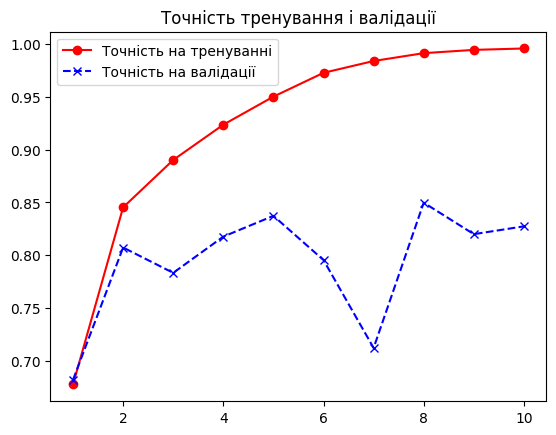

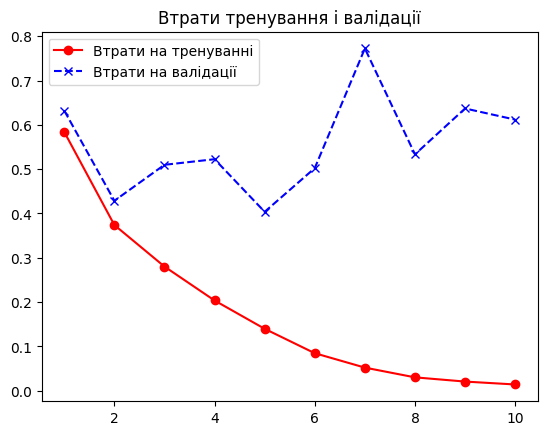

In [7]:
acc = rnn_history_1.history['acc']
loss = rnn_history_1.history['loss']

val_acc = rnn_history_1.history['val_acc']
val_loss = rnn_history_1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

Аналізуя результати роботи RNN моделі, можна зробити висновки що на тренувальних данних система гарно передбачає результат і має високу точність 99,06%, але показує перенавчання на валідаційних данних.

Для того щоб уснути негативний ефект від перенавчання - додамо шар Dropout в модель

In [8]:
from keras.regularizers import l2
from keras.layers import Embedding, SimpleRNN, Dense, Dropout

rnn_model_2 = Sequential()
rnn_model_2.add(Embedding(max_features, 32))
rnn_model_2.add(SimpleRNN(32, kernel_regularizer=l2(0.001)))
rnn_model_2.add(Dropout(0.5)) #додамо шар Dropout в модель
rnn_model_2.add(Dense(1, activation='sigmoid'))

rnn_model_2.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

rnn_history_2 = rnn_model_2.fit(input_train,
                            y_train,
                            epochs=10,
                            batch_size=batch_size,
                            validation_split=0.3)

Epoch 1/10
188/188 [==============================] - 52s 267ms/step - loss: 0.7210 - acc: 0.5235 - val_loss: 0.6889 - val_acc: 0.6346
Epoch 2/10
188/188 [==============================] - 46s 247ms/step - loss: 0.5309 - acc: 0.7713 - val_loss: 0.4675 - val_acc: 0.8100
Epoch 3/10
188/188 [==============================] - 45s 241ms/step - loss: 0.3538 - acc: 0.8675 - val_loss: 0.4578 - val_acc: 0.8055
Epoch 4/10
188/188 [==============================] - 44s 229ms/step - loss: 0.2732 - acc: 0.9072 - val_loss: 0.4437 - val_acc: 0.8190
Epoch 5/10
188/188 [==============================] - 42s 226ms/step - loss: 0.2112 - acc: 0.9327 - val_loss: 0.4143 - val_acc: 0.8476
Epoch 6/10
188/188 [==============================] - 44s 236ms/step - loss: 0.1542 - acc: 0.9564 - val_loss: 0.6278 - val_acc: 0.7518
Epoch 7/10
188/188 [==============================] - 42s 225ms/step - loss: 0.1203 - acc: 0.9688 - val_loss: 0.6016 - val_acc: 0.8011
Epoch 8/10
188/188 [==============================] - 4

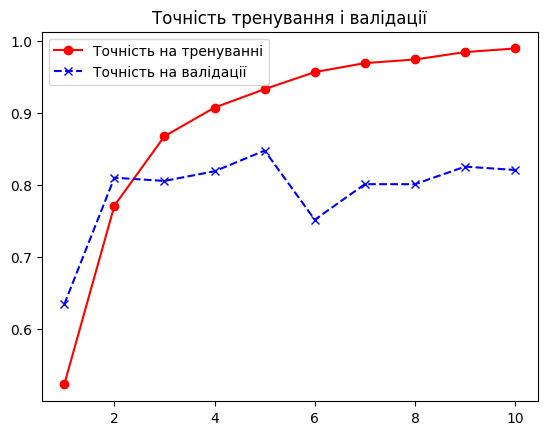

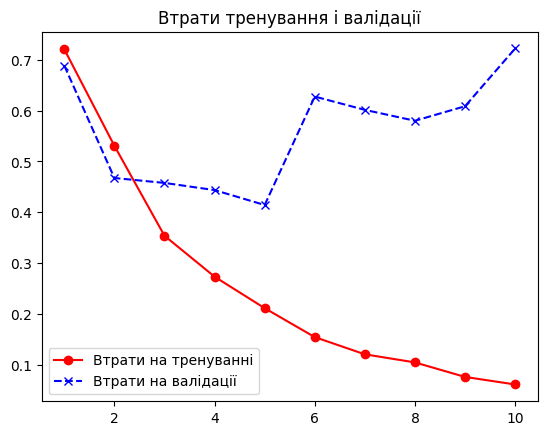

In [9]:
acc = rnn_history_2.history['acc']
loss = rnn_history_2.history['loss']

val_acc = rnn_history_2.history['val_acc']
val_loss = rnn_history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

Порівняємо результати наших двох RNN моделей

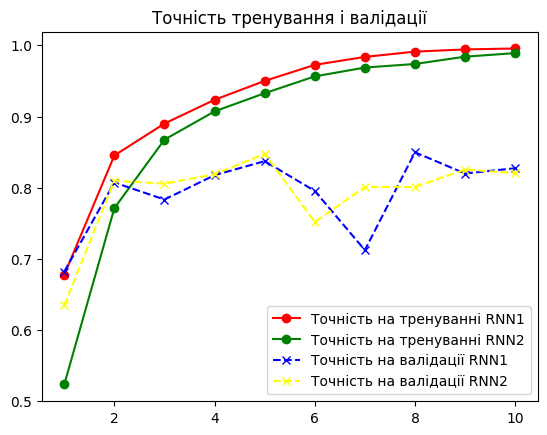

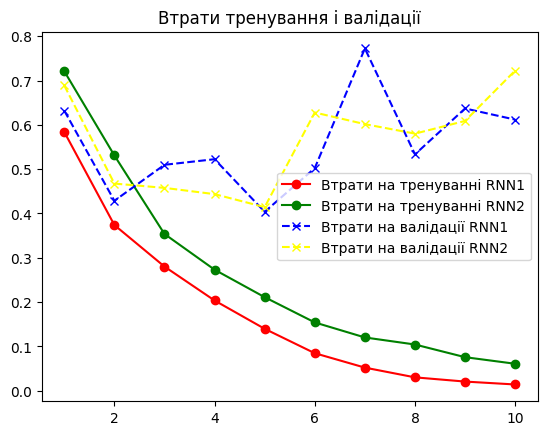

In [10]:
acc_1 = rnn_history_1.history['acc']
acc_2 = rnn_history_2.history['acc']

loss_1 = rnn_history_1.history['loss']
loss_2 = rnn_history_2.history['loss']

val_acc_1 = rnn_history_1.history['val_acc']
val_acc_2 = rnn_history_2.history['val_acc']

val_loss_1 = rnn_history_1.history['val_loss']
val_loss_2 = rnn_history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc_1, marker='o', linestyle='-', color='red', label='Точність на тренуванні RNN1')
plt.plot(epochs, acc_2, marker='o', linestyle='-', color='green', label='Точність на тренуванні RNN2')
plt.plot(epochs, val_acc_1, marker='x', linestyle='--', color='blue', label='Точність на валідації RNN1')
plt.plot(epochs, val_acc_2, marker='x', linestyle='--', color='yellow', label='Точність на валідації RNN2')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()
plt.plot(epochs, loss_1, marker='o', linestyle='-', color='red', label='Втрати на тренуванні RNN1')
plt.plot(epochs, loss_2, marker='o', linestyle='-', color='green', label='Втрати на тренуванні RNN2')
plt.plot(epochs, val_loss_1, marker='x', linestyle='--', color='blue', label='Втрати на валідації RNN1')
plt.plot(epochs, val_loss_2, marker='x', linestyle='--', color='yellow', label='Втрати на валідації RNN2')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

Результати після додавання шару Dropout показують поліпшення, але ознаки перенавчання все ще присутні.

Спробуємо EarlyStopping щоб зупинити навчання на більш ранньому етапі, коли валідаційна втрата починає зростати.

In [11]:
from keras.callbacks import EarlyStopping

rnn_model_3 = Sequential()
rnn_model_3.add(Embedding(max_features, 32))
rnn_model_3.add(SimpleRNN(32, kernel_regularizer=l2(0.001)))
rnn_model_3.add(Dropout(0.5))  # Збільшемо Dropout
rnn_model_3.add(Dense(1, activation='sigmoid'))

rnn_model_3.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=2,
                               restore_best_weights=True)

rnn_history_3 = rnn_model_3.fit(input_train,
                            y_train,
                            epochs=10,
                            batch_size=batch_size,
                            validation_split=0.3,
                            callbacks=[early_stopping]) #Додамо EarlyStopping

Epoch 1/10
188/188 [==============================] - 53s 274ms/step - loss: 0.7092 - acc: 0.5540 - val_loss: 0.8344 - val_acc: 0.4888
Epoch 2/10
188/188 [==============================] - 47s 248ms/step - loss: 0.5144 - acc: 0.7837 - val_loss: 0.5318 - val_acc: 0.7584
Epoch 3/10
188/188 [==============================] - 44s 233ms/step - loss: 0.3754 - acc: 0.8610 - val_loss: 0.3890 - val_acc: 0.8513
Epoch 4/10
188/188 [==============================] - 44s 235ms/step - loss: 0.2958 - acc: 0.8980 - val_loss: 0.4990 - val_acc: 0.8030
Epoch 5/10
188/188 [==============================] - 44s 232ms/step - loss: 0.2404 - acc: 0.9194 - val_loss: 0.4920 - val_acc: 0.7905


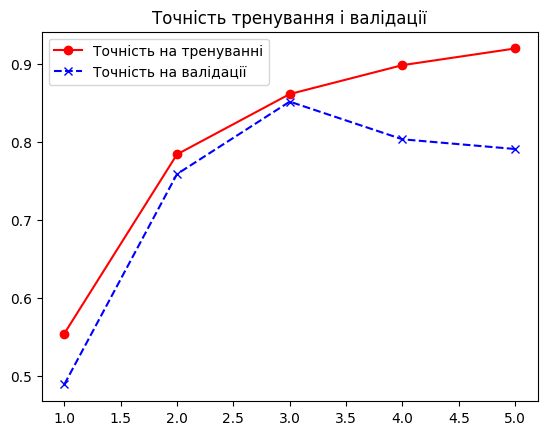

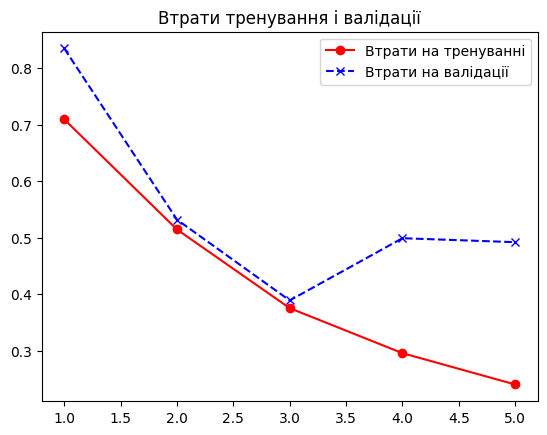

In [12]:
acc = rnn_history_3.history['acc']
loss = rnn_history_3.history['loss']

val_acc = rnn_history_3.history['val_acc']
val_loss = rnn_history_3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

EarlyStopping допомогло запобігти подальшому погіршенню продуктивності через перенавчання. Незважаючи на поліпшення, ознаки перенавчання все ще спостерігаються.

LSTM

In [13]:
from keras.layers import LSTM

In [14]:
max_features = 10000
maxlen = 250
batch_size = 64

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(f"Загальна кількість зразків тренувальних даних: {len(input_train)}")
print(f"Загальна кількість зразків тестових даних: {len(input_test)}")

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)


lstm_model = Sequential()

lstm_model.add(Embedding(max_features, 32))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))


lstm_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
lstm_model.summary()


lstm_history = lstm_model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    validation_split=0.3
)

Загальна кількість зразків тренувальних даних: 25000
Загальна кількість зразків тестових даних: 25000
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
274/274 [==============================] - 26s 89ms/step - loss: 0.5276 - accuracy: 0.7223 - val_loss: 0.3573 - val_accuracy: 0.8499
Epoch 2/10
274/274 [================

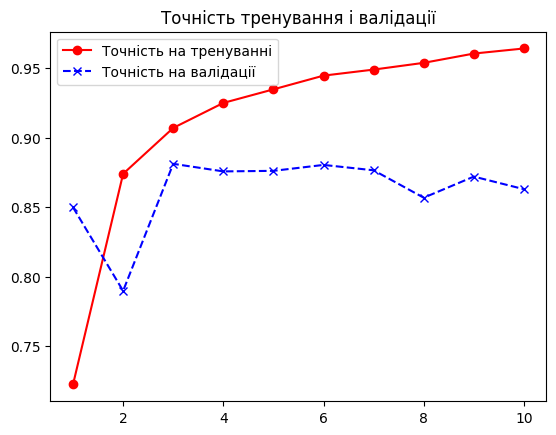

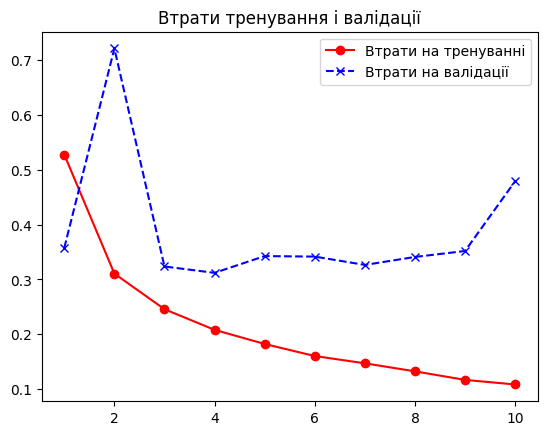

In [15]:
acc = lstm_history.history['accuracy']
loss = lstm_history.history['loss']

val_acc = lstm_history.history['val_accuracy']
val_loss = lstm_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

LSTM модель навчається трохи довше. Точність на тренувальних данних сягає 95,27%.
LSTM показує більш стабільні результати і більш ефективно запобігає перенавчанню, ніж Simple RNN модель.
Bidirectional RNN

In [16]:
from keras.layers import Bidirectional

In [17]:
max_features = 10000
maxlen = 250
batch_size = 64

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

brrn_model = Sequential()
brrn_model.add(Embedding(max_features, 32))
brrn_model.add(Bidirectional(LSTM(32)))
brrn_model.add(Dense(1, activation='sigmoid'))


brrn_model.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])


brrn_history = brrn_model.fit(input_train,
                             y_train,
                             batch_size=batch_size,
                             epochs=10,
                             validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 44s 146ms/step - loss: 0.4816 - accuracy: 0.7645 - val_loss: 0.3337 - val_accuracy: 0.8645
Epoch 2/10
274/274 [==============================] - 19s 70ms/step - loss: 0.2546 - accuracy: 0.9011 - val_loss: 0.3078 - val_accuracy: 0.8696
Epoch 3/10
274/274 [==============================] - 15s 53ms/step - loss: 0.1778 - accuracy: 0.9363 - val_loss: 0.3203 - val_accuracy: 0.8711
Epoch 4/10
274/274 [==============================] - 12s 44ms/step - loss: 0.1297 - accuracy: 0.9577 - val_loss: 0.3486 - val_accuracy: 0.8679
Epoch 5/10
274/274 [==============================] - 10s 38ms/step - loss: 0.1120 - accuracy: 0.9638 - val_loss: 0.3620 - val_accuracy: 0.8636
Epoch 6/10
274/274 [==============================] - 8s 30ms/step - loss: 0.0892 - accuracy: 0.9727 - val_loss: 0.4870 - val_accuracy: 0.8687
Epoch 7/10
274/274 [==============================] - 7s 25ms/step - loss: 0.0918 - accuracy: 0.9720 - val_loss: 0.5015 - val_accuracy: 

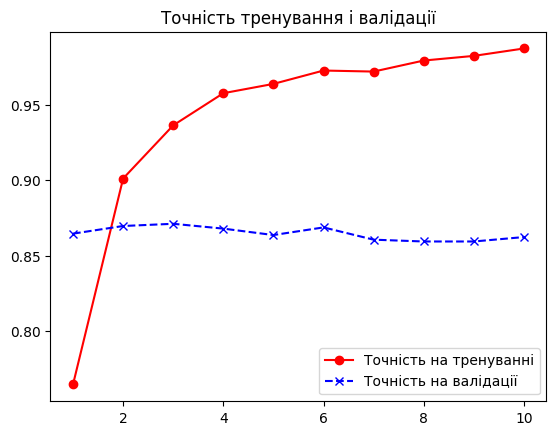

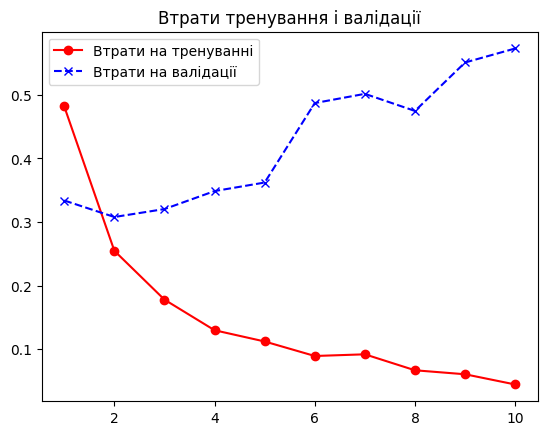

In [18]:
acc = brrn_history.history['accuracy']
loss = brrn_history.history['loss']

val_acc = brrn_history.history['val_accuracy']
val_loss = brrn_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

Модель Bidirectional RNN показує гарну точність на тренувальних даних - 95,42%. Однак на валідаційних даних точність стає нижчою, ніж у моделі, що використовує просто LSTM. Це каже про те, що ця модель схильна до перенавчання або має проблеми з узагальненням.
Глибока

In [19]:
max_features = 10000
maxlen = 250
batch_size = 64

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)


deep_model = Sequential()
deep_model.add(Embedding(max_features, 32))
deep_model.add(LSTM(32, return_sequences=True))
deep_model.add(LSTM(32))
deep_model.add(Dense(1, activation='sigmoid'))

deep_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

deep_history = deep_model.fit(input_train,
                              y_train,
                              epochs=10,
                              batch_size=batch_size,
                              validation_split=0.3
                              )

Epoch 1/10
274/274 [==============================] - 23s 72ms/step - loss: 0.5185 - accuracy: 0.7199 - val_loss: 0.4545 - val_accuracy: 0.8060
Epoch 2/10
274/274 [==============================] - 13s 46ms/step - loss: 0.3061 - accuracy: 0.8777 - val_loss: 0.3300 - val_accuracy: 0.8597
Epoch 3/10
274/274 [==============================] - 9s 34ms/step - loss: 0.2399 - accuracy: 0.9107 - val_loss: 0.3336 - val_accuracy: 0.8537
Epoch 4/10
274/274 [==============================] - 9s 31ms/step - loss: 0.2005 - accuracy: 0.9267 - val_loss: 0.3084 - val_accuracy: 0.8700
Epoch 5/10
274/274 [==============================] - 9s 32ms/step - loss: 0.1751 - accuracy: 0.9363 - val_loss: 0.3781 - val_accuracy: 0.8609
Epoch 6/10
274/274 [==============================] - 7s 26ms/step - loss: 0.1524 - accuracy: 0.9461 - val_loss: 0.3260 - val_accuracy: 0.8844
Epoch 7/10
274/274 [==============================] - 7s 24ms/step - loss: 0.1374 - accuracy: 0.9537 - val_loss: 0.3616 - val_accuracy: 0.85

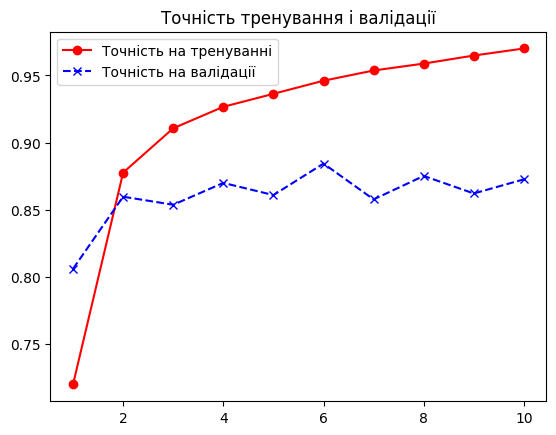

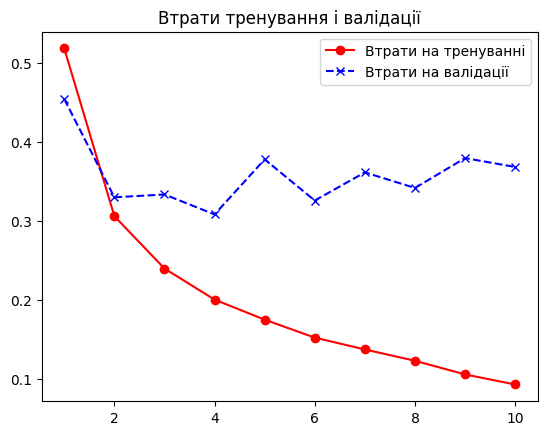

In [20]:
acc = deep_history.history['accuracy']
loss = deep_history.history['loss']

val_acc = deep_history.history['val_accuracy']
val_loss = deep_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

Точність на тренувальних даних сягає 96,74%.
Модель добре навчається і здатна узагальнювати дані на валідаційному наборі. Однак можливе перенавчання.
Додамо шар Dropout після кожного шару LSTM

In [21]:
deep_model_2 = Sequential()
deep_model_2.add(Embedding(max_features, 32))
deep_model_2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
deep_model_2.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
deep_model_2.add(Dense(1, activation='sigmoid'))

deep_model_2.compile(optimizer='rmsprop',
                                loss='binary_crossentropy',
                                metrics=['accuracy'])

deep_history_2 = deep_model_2.fit(input_train,y_train,epochs=10,batch_size=batch_size,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 449s 2s/step - loss: 0.5420 - accuracy: 0.7042 - val_loss: 0.3781 - val_accuracy: 0.8352
Epoch 2/10
274/274 [==============================] - 467s 2s/step - loss: 0.3268 - accuracy: 0.8670 - val_loss: 0.3235 - val_accuracy: 0.8647
Epoch 3/10
274/274 [==============================] - 447s 2s/step - loss: 0.2633 - accuracy: 0.8987 - val_loss: 0.3454 - val_accuracy: 0.8673
Epoch 4/10
274/274 [==============================] - 460s 2s/step - loss: 0.2254 - accuracy: 0.9165 - val_loss: 0.3153 - val_accuracy: 0.8803
Epoch 5/10
274/274 [==============================] - 453s 2s/step - loss: 0.1928 - accuracy: 0.9287 - val_loss: 0.3056 - val_accuracy: 0.8784
Epoch 6/10
274/274 [==============================] - 441s 2s/step - loss: 0.1766 - accuracy: 0.9369 - val_loss: 0.3245 - val_accuracy: 0.8829
Epoch 7/10
274/274 [==============================] - 439s 2s/step - loss: 0.1587 - accuracy: 0.9420 - val_loss: 0.3224 - val_accuracy: 0.8813

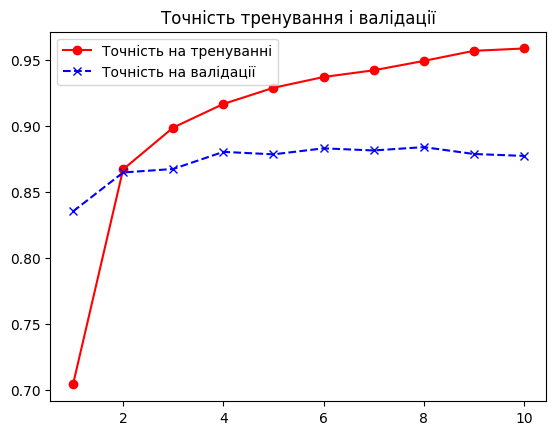

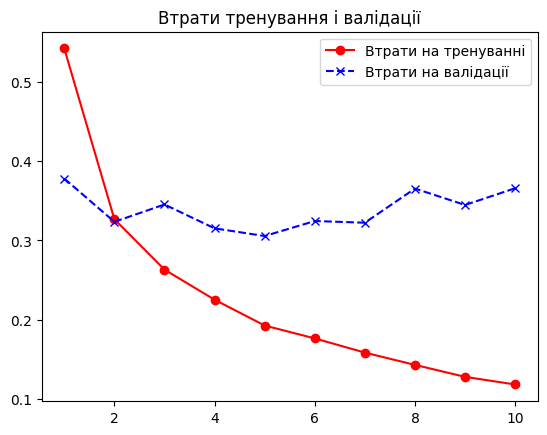

In [22]:
acc = deep_history_2.history['accuracy']
loss = deep_history_2.history['loss']

val_acc = deep_history_2.history['val_accuracy']
val_loss = deep_history_2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

Додавання шарів Dropout після кожного шару LSTM трішки допомогло поліпшити результати порівняно з моделлю deep_model без регуляризації. Однак є деякий розрив між точністю на навчальному і валідаційному наборах даних, це вказує на деяке перенавчання.
Спробуємо оптимізатор Adam

In [23]:
deep_model_3 = Sequential()
deep_model_3.add(Embedding(max_features, 32))
deep_model_3.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
deep_model_3.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
deep_model_3.add(Dense(1, activation='sigmoid'))

deep_model_3.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

deep_history_3 = deep_model_3.fit(input_train,y_train,epochs=10,batch_size=batch_size,validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 461s 2s/step - loss: 0.4519 - accuracy: 0.7756 - val_loss: 0.3059 - val_accuracy: 0.8727
Epoch 2/10
274/274 [==============================] - 442s 2s/step - loss: 0.2422 - accuracy: 0.9079 - val_loss: 0.3498 - val_accuracy: 0.8621
Epoch 3/10
274/274 [==============================] - 441s 2s/step - loss: 0.1808 - accuracy: 0.9339 - val_loss: 0.3201 - val_accuracy: 0.8811
Epoch 4/10
274/274 [==============================] - 427s 2s/step - loss: 0.1541 - accuracy: 0.9439 - val_loss: 0.3559 - val_accuracy: 0.8773
Epoch 5/10
274/274 [==============================] - 440s 2s/step - loss: 0.1145 - accuracy: 0.9616 - val_loss: 0.4084 - val_accuracy: 0.8551
Epoch 6/10
274/274 [==============================] - 429s 2s/step - loss: 0.1012 - accuracy: 0.9653 - val_loss: 0.4269 - val_accuracy: 0.8717
Epoch 7/10
274/274 [==============================] - 430s 2s/step - loss: 0.0712 - accuracy: 0.9768 - val_loss: 0.5013 - val_accuracy: 0.8657

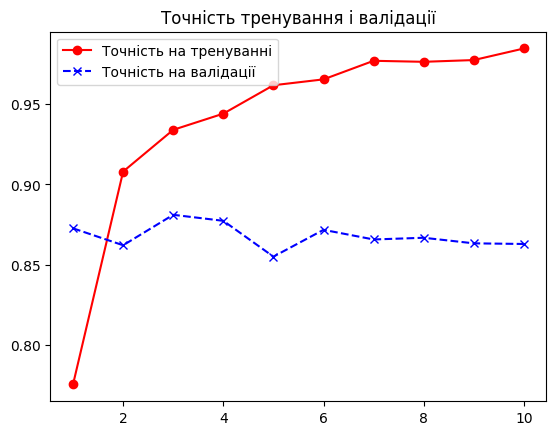

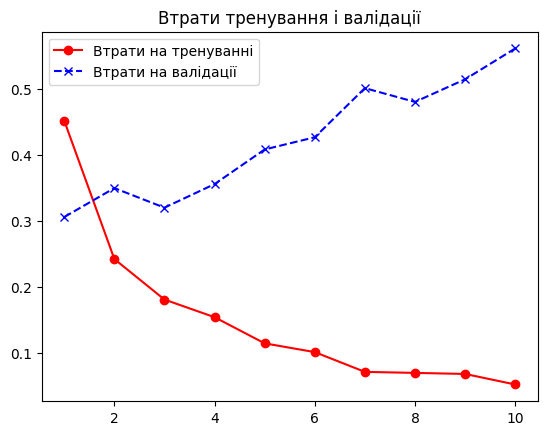

In [24]:
acc = deep_history_3.history['accuracy']
loss = deep_history_3.history['loss']

val_acc = deep_history_3.history['val_accuracy']
val_loss = deep_history_3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, marker='o', linestyle='-', color='red', label='Точність на тренуванні')
plt.plot(epochs, val_acc, marker='x', linestyle='--', color='blue', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()
plt.plot(epochs, loss, marker='o', linestyle='-', color='red', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, marker='x', linestyle='--', color='blue', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

Оптимізатор Adam не дав значного поліпшення порівняно з попередніми результатами.


**Загальний висновок:**



1.   RNN має проблеми з перенавчанням, на нових данних похибка буде значною.
2.   LSTM досягла високої точності на валідаційних данних 87%, є більш складною для навчання, порівняно з RNN
3. Bidirectional RNN досягла високої точності на валідаційних данних 87%, більш складна за попередні 2, вона потребує більше обчислювальної потужності та часу для досягнення хороших результатів. Але обираючии серед 4 варіантів, я б обирала роботу саме з цією моделлю.
4. Deep LSTM досягла високої точності на валідаційних данних 87,5% може обробляти складніші залежності в даних, оскільки має кілька шарів LSTM, є ризик перенавчання.

